In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


# Data Understanding

In [4]:
df = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv',encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.shape

(15509, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df.isna().sum().to_frame()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


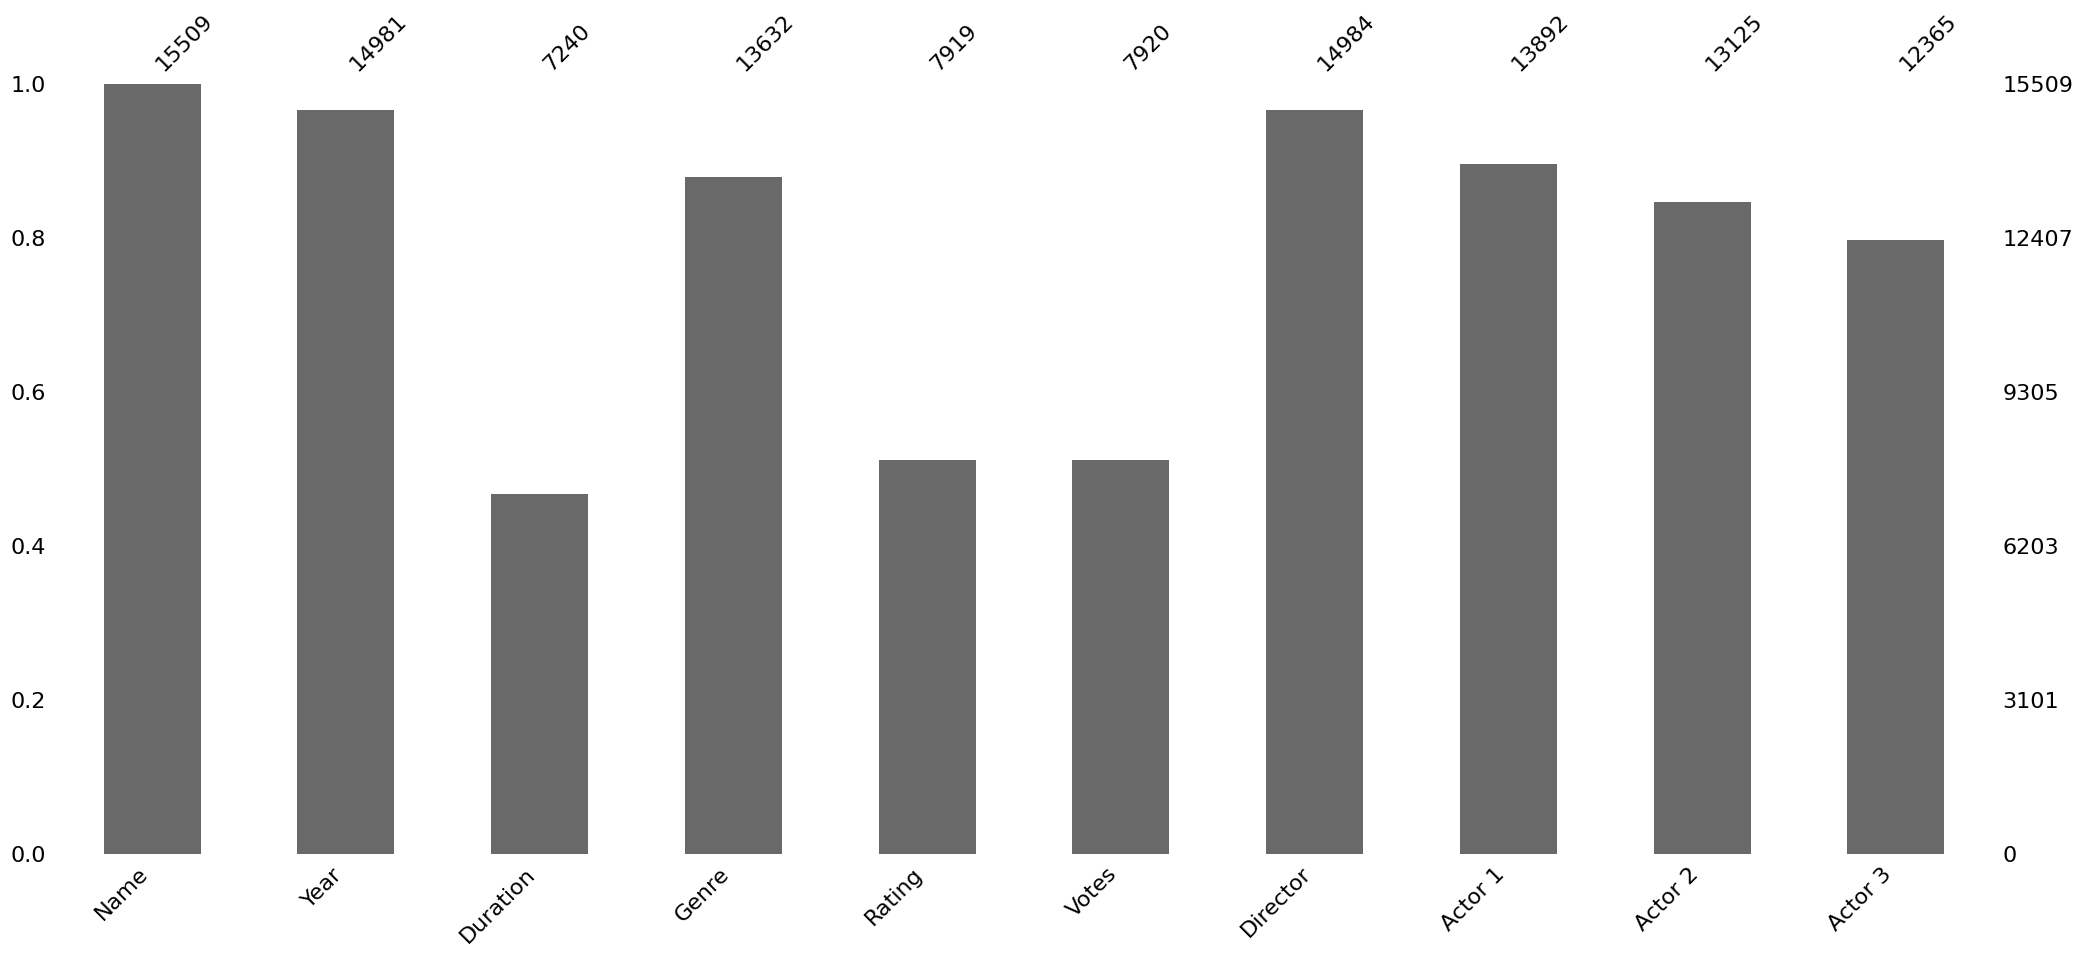

In [15]:
msno.bar(df)
plt.show()

In [17]:
df.duplicated().sum()

6

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

# PreProcessing

In [ ]:
# Drop insignificant columns
df.drop(columns = ['Name', 'Duration'], axis = 1,inplace = True)
df.head()

In [23]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [25]:
categorical_columns = df.select_dtypes("object")


In [26]:
Ratingfor i in categorical_columns:
    m = df[i].mode()[0]
    df[i].fillna(m,inplace=True)

/tmp/ipykernel_34/4225636782.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(m,inplace=True)


In [29]:
mean = df.Rating.mean()
df['Rating'].fillna(mean, inplace = True)

/tmp/ipykernel_34/3747497530.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(mean, inplace = True)


In [31]:
df.isna().sum()

Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [32]:
df['Year'] = df['Year'].str.strip('()').astype(int)
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].str.replace('.','')
df['Votes'] = df['Votes'].str.strip('$')
df['Votes'] = df['Votes'].str.strip('M')
df['Votes'] = df['Votes'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15503 non-null  int64  
 1   Genre     15503 non-null  object 
 2   Rating    15503 non-null  float64
 3   Votes     15503 non-null  int64  
 4   Director  15503 non-null  object 
 5   Actor 1   15503 non-null  object 
 6   Actor 2   15503 non-null  object 
 7   Actor 3   15503 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.1+ MB


In [38]:
df.nunique()

Year         102
Genre        485
Rating        85
Votes       2034
Director    5938
Actor 1     4718
Actor 2     4891
Actor 3     4820
dtype: int64

#### due to the fact that we have a lot of unique data, it is better for us to use the mean

In [39]:
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)
df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)
df.head()

,Year,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,2019,5.8,6.0,5.8,5.8,5.8,5.5,5.8
1,2019,7.0,6.0,5.8,7.0,6.8,7.0,7.0
2,2021,5.8,6.3,5.8,5.8,6.2,6.8,5.8
3,2019,4.4,5.7,5.9,4.4,5.4,4.4,4.4
4,2010,5.8,6.0,5.8,6.3,6.8,5.8,5.5


# MODEL

In [40]:
X = df.drop(columns = 'Rating')
y = df['Rating']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
X_train.shape

(12402, 7)

In [45]:
X_test.shape


(3101, 7)

In [46]:
y_train.shape

(12402,)

In [47]:
y_test.shape

(3101,)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [59]:
dct = {
    'Linear':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'RandomForest':RandomForestRegressor()
}

In [60]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [61]:
train_mse = [] #(Mean Squared Error)
train_r2 = [] #(R-squared)
train_cv = [] #Cross-validated R2 (CV R-squared)
test_r2 = []
test_mse = []

In [62]:
for name, model in dct.items():
    # Fit the model
    m = model.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)
    
    # Calculate MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Calculate R2
    r2_train = r2_score(y_train, y_pred_train) * 100
    r2_test = r2_score(y_test, y_pred_test) * 100  # Use y_pred_test here
    
    # Calculate cross-validated R2 scores
    cv_scores = cross_val_score(m, X_train, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean() * 100  # Mean of cross-validated scores
    
    # Append results to respective lists
    train_mse.append(mse_train)
    train_r2.append(r2_train)
    test_mse.append(mse_test)
    test_r2.append(r2_test)
    train_cv.append(cv_mean)
    
    # Print the results for the current model
    print(f'Scores for {name}')
    print("Training Scores")
    print(f'MSE: {train_mse}')
    print(f'R2: {train_r2}')
    print("Testing Scores")
    print(f'MSE: {test_mse}')
    print(f'R2: {test_r2}')
    print(f'CV R2: {train_cv}')
    print("===============================")

Scores for Linear
Training Scores
MSE: [0.24735238564111914]
R2: [74.63689928713907]
Testing Scores
MSE: [0.24300163821394138]
R2: [75.10935991463474]
CV R2: [74.53728769296235]
Scores for DecisionTree
Training Scores
MSE: [0.24735238564111914, 2.875880234370817e-06]
R2: [74.63689928713907, 99.99970511204154]
Testing Scores
MSE: [0.24300163821394138, 0.4069494356659141]
R2: [75.10935991463474, 58.316198974819734]
CV R2: [74.53728769296235, 58.59223480725154]
Scores for GradientBoosting
Training Scores
MSE: [0.24735238564111914, 2.875880234370817e-06, 0.19101686762028042]
R2: [74.63689928713907, 99.99970511204154, 80.41344926287618]
Testing Scores
MSE: [0.24300163821394138, 0.4069494356659141, 0.20555931781845505]
R2: [75.10935991463474, 58.316198974819734, 78.9445740628804]
CV R2: [74.53728769296235, 58.59223480725154, 78.2490599594584]
Scores for KNN
Training Scores
MSE: [0.24735238564111914, 2.875880234370817e-06, 0.19101686762028042, 0.18300957910014515]
R2: [74.63689928713907, 99.9

In [63]:
results = {'Name':list(dct.keys()),
       'MSE Training Scores':train_mse,
       'MSE Testing Scores':test_mse,
       'R2 Training Scores':train_r2,
       'R2 Testing Scores':test_r2,
       'CV Training Scores':train_cv}

In [64]:
df_results = pd.DataFrame(results)
df_results.sort_values('CV Training Scores', ascending=False)

,Name,MSE Training Scores,MSE Testing Scores,R2 Training Scores,R2 Testing Scores,CV Training Scores
5,RandomForest,0.027290,0.196335,97.201773,79.889419,79.943231
2,GradientBoosting,0.191017,0.205559,80.413449,78.944574,78.249060
0,Linear,0.247352,0.243002,74.636899,75.109360,74.537288
3,KNN,0.183010,0.275502,81.234503,71.780301,70.779156
1,DecisionTree,0.000003,0.406949,99.999705,58.316199,58.592235
4,SVR,0.972652,0.969747,0.265837,0.668862,0.059695
